# Glaucoma
Glaucoma is an eye disease and it causes permanent vision damage when the diagnosis is made late.

In [ ]:
# Importing Libraries
import numpy as np
import keras
import tensorflow
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras.layers.convolutional import *
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
%matplotlib inline
from keras.callbacks import History 
history = History()

In [ ]:
# Load the Drive helper and mount
from google.colab import drive
# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd '/content/drive/My Drive'

/content/drive/My Drive


In [ ]:
pwd

'/content/drive/My Drive'

In [ ]:
# Lists the content of your google drive
!ls "/content/drive/"

MyDrive


In [ ]:
train_path = "/content/drive/My Drive//Glaucoma_mixed/Train"
test_path = "/content/drive/My Drive//Glaucoma_mixed/Test"
valid_path = "/content/drive/My Drive//Glaucoma_mixed/Validation"

In [ ]:
train_batches = ImageDataGenerator(rotation_range=10, width_shift_range=0.1,height_shift_range=0.1, shear_range=0.15, zoom_range=0.1,channel_shift_range=10., horizontal_flip=True).flow_from_directory(train_path, target_size=(224,224), classes=['glaucoma','healthy'], batch_size=32)
test_batches = ImageDataGenerator(rotation_range=10, width_shift_range=0.1,height_shift_range=0.1, shear_range=0.15, zoom_range=0.1, 
       channel_shift_range=10., horizontal_flip=True).flow_from_directory(test_path, target_size=(224,224), classes =['glaucoma','healthy'], batch_size=32)
valid_batches = ImageDataGenerator().flow_from_directory(valid_path, target_size=(224,224), classes =['glaucoma','healthy'], batch_size=32)

Found 1120 images belonging to 2 classes.
Found 308 images belonging to 2 classes.
Found 164 images belonging to 2 classes.


In [ ]:
def plot_confusion_matrix(cm, classes, 
                          normalize=False,
                         title = 'Confusion Matrix',
                         cmap=plt.cm.Blues):
  
  plt.imshow(cm, interpolation = 'nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation = 45)
  plt.yticks(tick_marks, classes)
  
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1) [:, np.newaxis]
    print("Normalized Confusion Matrix")
  else:
    print("Confusion Matrix without normalization")
  
  print(cm)
  
  thresh = cm.max() / 2.
  
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j,i, cm[i,j],
            horizontalalignment ="center",
            color = "white" if cm[i,j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Fine Tuned Model with VGG-16

In [ ]:
vgg16_model = tf.keras.applications.vgg16.VGG16()


553476096/553467096 [==============================] - 14s 0us/step


In [ ]:
model = Sequential()
for layer in vgg16_model.layers[:-1]:
    model.add(layer)

In [ ]:
for layer in model.layers:
    layer.trainable = False

In [ ]:
model.add(Dense(2, activation='softmax'))

In [ ]:
model.compile(Adam(learning_rate=.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_batches, 
                    steps_per_epoch= 14,  
                    validation_data= test_batches, 
                    validation_steps= 1, 
                    epochs=100
                    )

Epoch 1/100
14/14 [==============================] - 347s 22s/step - loss: 0.9605 - accuracy: 0.4888 - val_loss: 0.7467 - val_accuracy: 0.5938
Epoch 2/100
14/14 [==============================] - 210s 15s/step - loss: 0.6842 - accuracy: 0.6049 - val_loss: 0.4858 - val_accuracy: 0.7188
Epoch 3/100
14/14 [==============================] - 155s 11s/step - loss: 0.6652 - accuracy: 0.6205 - val_loss: 0.2877 - val_accuracy: 0.8438
Epoch 4/100
14/14 [==============================] - 112s 8s/step - loss: 0.6456 - accuracy: 0.6719 - val_loss: 0.2269 - val_accuracy: 0.9688
Epoch 5/100
14/14 [==============================] - 92s 7s/step - loss: 0.5852 - accuracy: 0.6942 - val_loss: 0.2964 - val_accuracy: 0.8438
Epoch 6/100
14/14 [==============================] - 65s 5s/step - loss: 0.5373 - accuracy: 0.7388 - val_loss: 0.4296 - val_accuracy: 0.7812
Epoch 7/100
14/14 [==============================] - 57s 4s/step - loss: 0.5101 - accuracy: 0.7500 - val_loss: 0.3611 - val_accuracy: 0.7812
Epoch 

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       2

In [ ]:
def plots(ims, figsize=(12,6), rows=5, interp=False, titles=None):
  if type(ims[0]) is np.ndarray:
    ims = np.array(ims).astype(np.uint8)
    if(ims.shape[-1] != 3):
      ims = ims.transpose ((0,2,3,1))
  f = plt.figure(figsize = figsize)
  cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows +1
  for i in range(len(ims)):
    sp = f.add_subplot (rows, cols, i+1)
    sp.axis('Off')
    if titles is not None:
      sp.set_title(titles[i], fontsize =10)
    plt.imshow(ims[i], interpolation=None if interp else 'none')

In [ ]:
test_batches_fine = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, 
       height_shift_range=0.1, shear_range=0.15, zoom_range=0.1, 
       channel_shift_range=10., horizontal_flip=True).flow_from_directory(test_path, target_size=(224,224), classes =['glaucoma','healthy'], batch_size=50)

Found 308 images belonging to 2 classes.


In [ ]:
test_imgs, test_labels = next(test_batches_fine)

[0 1 1 0 1 1 0 1 0 0 0 1 0 1 0 1 1 0 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 0 0 1 0
 0 1 1 0 1 1 0 0 0 0 0 0 1]


/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


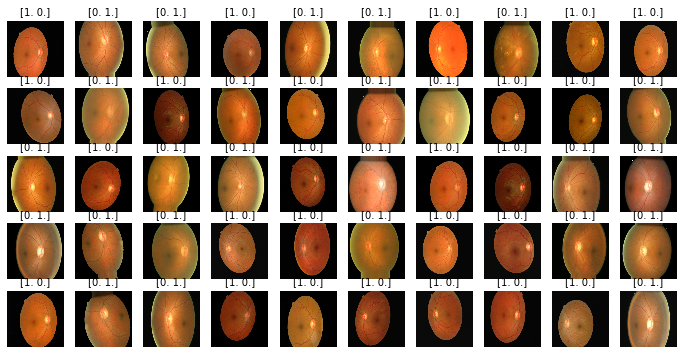

In [ ]:
x_labels = test_labels.argmax(axis=1)
print(x_labels)
plots(test_imgs, titles=test_labels)

In [ ]:
predictions = model.predict(test_batches_fine, steps=1, verbose=0)

In [ ]:
x_labels

array([1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0])

In [ ]:
y_labels = predictions.argmax(axis=1)
y_labels

array([0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1])

In [ ]:
cm = confusion_matrix(x_labels, y_labels)

In [ ]:
cm_plot_labels = ['Glaucoma', 'Healthy']

Confusion Matrix without normalization
[[25  0]
 [ 4 21]]


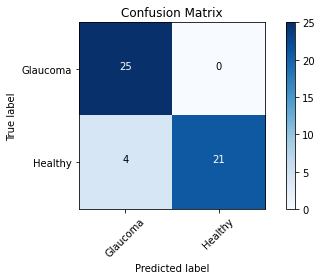

In [ ]:
plot_confusion_matrix(cm, cm_plot_labels, title ='Confusion Matrix')

In [ ]:
# f1 score is 0.91!

In [ ]:
model.save("model_nocrop")

#model.save_model.load('model2')

INFO:tensorflow:Assets written to: model_nocrop/assets
